# grn bench perturb seq (actually it is medium)

In [1]:
from scprint import scPrint
from scdataloader import Preprocessor
from scprint.tasks import GRNfer

from bengrn import BenGRN, get_sroy_gt, get_perturb_gt

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3, compute_scenic
from grnndata import utils as grnutils

import scanpy as sc

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
2024-05-16 09:34:13,074:INFO - Downloading data from `https://omnipathdb.org/queries/enzsub?format=json`
2024-05-16 09:34:13,174:INFO - Downloading data from `https://omnipathdb.org/queries/interactions?format=json`
2024-05-16 09:34:13,264:INFO - Downloading data from `https://omnipathdb.org/queries/complexes?format=json`
2024-05-16 09:34:13,356:INFO - Downloading data from `https://omnipathdb.org/queries/annotations?format=json`
2024-05-16 09:34:13,443:INFO - Downloading data from `https://omnipathdb.org/queries/intercell?format=json`
2024-05-16 09:34:13,617:INFO - Downloading data from `https://omnipathdb.org/about?format=text`
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/arboreto/core.py:12: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask D

In [2]:
adata = get_perturb_gt()

adata.var["isTF"]=False
adata.var.loc[adata.var.gene_name.isin(grnutils.TF), "isTF"]=True
adata.var["isTF"].sum()

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_io/specs/registry.py:249: OldFormatWarning: Element '/X' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/gem_group' was written without encoding metadata.
  return func(*args, **kwargs)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Element '/obs/__categories/gene' was written without encoding metadata.
  return func(*args, **kwargs)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_io/utils.py:205: OldFormatWarning: Ele

650

In [3]:
preprocessor = Preprocessor(force_preprocess=True, skip_validate=True, do_postp=False, min_valid_genes_id=5000, min_dataset_size=64)
nadata = preprocessor(adata.copy())
adata

Dropping layers:  KeysView(Layers with keys: )
checking raw counts
removed 0 non primary cells, 10691 renamining
filtered out 0 cells, 10691 renamining
Removed 8 genes.
startin QC
Seeing 10068 outliers (94.17% of total dataset):
done


GRnnData object with n_obs × n_vars = 10691 × 8563
    obs: 'gem_group', 'gene', 'gene_id', 'transcript', 'gene_transcript', 'sgID_AB', 'mitopercent', 'UMI_count', 'z_gemgroup_UMI', 'core_scale_factor', 'core_adjusted_UMI_count', 'organism_ontology_term_id'
    var: 'gene_name', 'chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano', 'isTF'
    varp: 'GRN'
    with a grn of 1115065 elements

In [4]:
model = scPrint.load_from_checkpoint('../../data/temp/wli32e2j/last.ckpt', precpt_gene_emb = None)

RuntimeError caught: scPrint is not attached to a `Trainer`.



In [7]:
grn_inferer = GRNfer(model, nadata,
    how="most var within",
    preprocess="softmax",
    head_agg='max',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=4000,
    max_cells=2048,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[6:])

/tmp/ipykernel_1177804/2195943765.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 8555


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:163: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 14462809, sparsity: 1.0


... storing 'organism_ontology_term_id' as categorical
... storing 'symbol' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


precision:  0.021438296003513393 
recall:  1.0 
random precision: 0.021443946582322966


 94%|█████████▍| 93/99 [00:02<00:00, 42.89it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:02<00:00, 41.90it/s]


Area Under Precision-Recall Curve (AUPRC):  0.032409888741493496
EPR: 1.7491569697341096


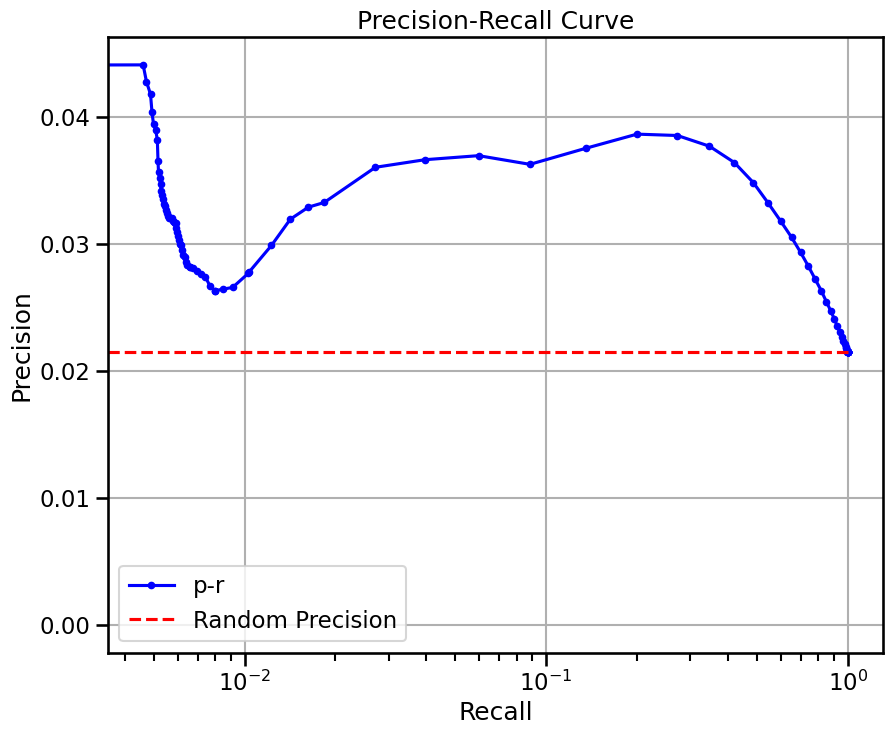

{'precision': 0.021438296003513393,
 'recall': 1.0,
 'rand_precision': 0.021443946582322966,
 'auprc': 0.032409888741493496,
 'EPR': 1.7491569697341096}

In [8]:
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)

In [10]:
grn_inferer = GRNfer(model, nadata,
    how="most var within",
    preprocess="softmax",
    head_agg='none',
    filtration="none",
    forward_mode="none",
    organisms=adata.obs['organism_ontology_term_id'][0],
    apc=False,
    symmetrize=False,
    num_genes=4000,
    max_cells=2048,
    doplot=False,
    batch_size=32,
)
grn = grn_inferer(layer=list(range(model.nlayers))[:])

/tmp/ipykernel_1177804/2492005879.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 8555


/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:163: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

... storing 'organism_ontology_term_id' as categorical
... storing 'symbol' as categorical
... storing 'biotype' as categorical
... storing 'description' as categorical
... storing 'synonyms' as categorical
... storing 'organism' as categorical


pred shape (2400, 3795, 96)
true elem 195260 ...
doing regression....


metrics {'used_heads': 70, 'precision': 0.10657553716244461, 'random_precision': 0.021736464019072716, 'recall': 0.03679383474163498, 'predicted_true': 47844, 'number_of_true': 138583, 'epr': 4.528085738473823}


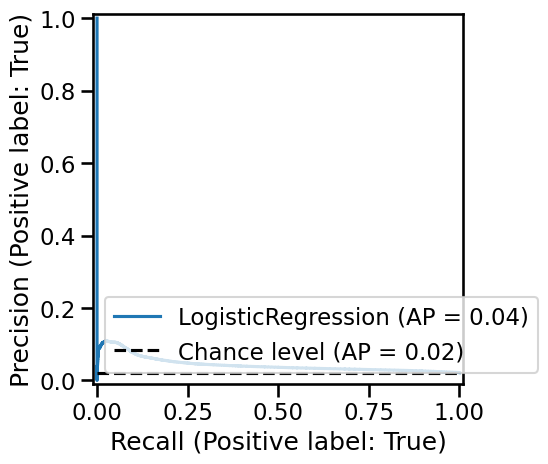

precision:  0.021438296003513393 
recall:  1.0 
random precision: 0.021443946582322966


 97%|█████████▋| 96/99 [00:05<00:00, 19.52it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:05<00:00, 18.70it/s]


Area Under Precision-Recall Curve (AUPRC):  0.04747946585311526
EPR: 4.4806861659044825


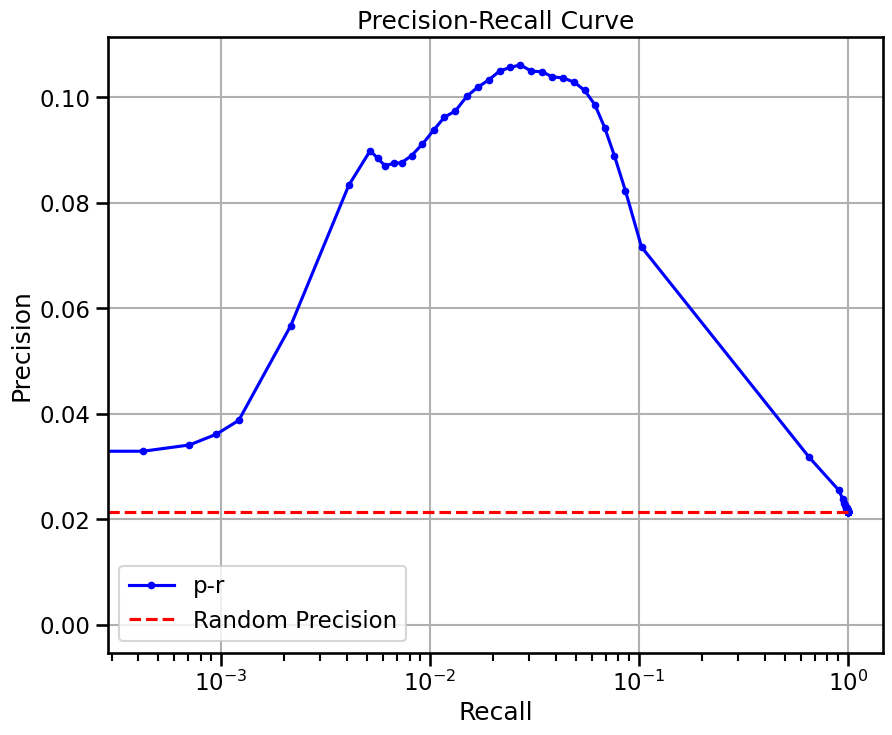

{'precision': 0.021438296003513393,
 'recall': 1.0,
 'rand_precision': 0.021443946582322966,
 'auprc': 0.04747946585311526,
 'EPR': 4.4806861659044825}

In [11]:
grn.var['ensembl_id'] = grn.var.index
grn.varp['all'] = grn.varp['GRN']
grn, m, clf = train_classifier(grn, other=adata, C=0.1, train_size=0.3, class_weight={1: 20, 0: 1}, shuffle=False, use_col="ensembl_id")
grn.varp['GRN'] = grn.varp['classified']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:265: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 11037 ...
doing regression....
metrics {'used_heads': 70, 'precision': 0.005152224824355972, 'random_precision': 0.001663091773755273, 'recall': 0.009657594381035996, 'predicted_true': 2135.0, 'number_of_true': 1139.0, 'epr': 3.1904783791089586}


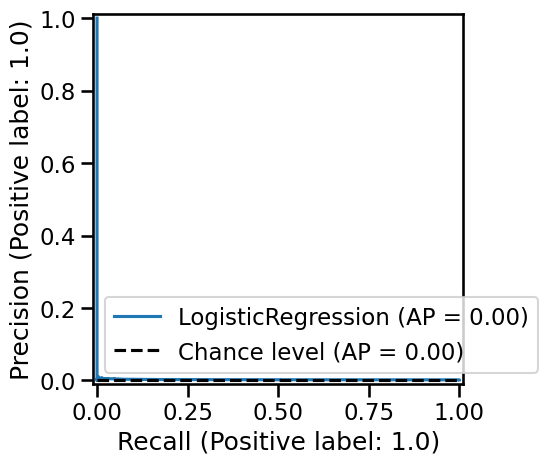

precision:  0.021438296003513393 
recall:  1.0 
random precision: 0.021443946582322966


 97%|█████████▋| 96/99 [00:04<00:00, 30.18it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:671: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:04<00:00, 23.08it/s]


Area Under Precision-Recall Curve (AUPRC):  0.028348000808702815
EPR: 2.5382320686215447


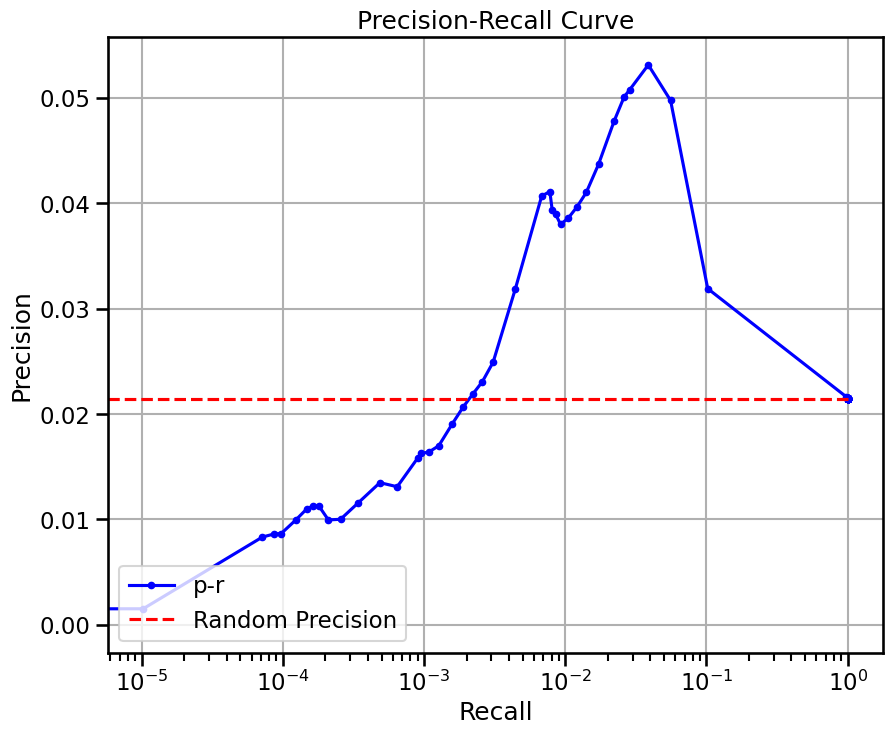

{'precision': 0.021438296003513393,
 'recall': 1.0,
 'rand_precision': 0.021443946582322966,
 'auprc': 0.028348000808702815,
 'EPR': 2.5382320686215447}

In [12]:
grn.varp['GRN'] = grn.varp['all']
grn, m, clf_omni = train_classifier(grn, C=0.1, train_size=0.9, class_weight={1: 200, 0: 1}, shuffle=True, use_col="gene_name")
grn.varp['GRN'] = grn.varp['classified']
BenGRN(grn, do_auc=True, doplot=True).compare_to(other=adata)

## we should try random express since otherwise a lot of genes will have an expression of 0...
if this is true, we to change some other tasks

- organism is mapped well in collator?? do we use the. right decoder / encoder
- if it becomes wosrst after the update it might mean the model is better when no expression is given? 